<a href="https://colab.research.google.com/github/Mtiwari27/Mukund_Bharat-Intern/blob/main/Task-1/BharatIntern_01Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :- Mukund Tiwari

Role/Position:- Machine Learning Intern

**House Price Prediction :**

Develop a machine learning model for predicting house prices using Python, scikit-learn, and TensorFlow.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
train_data=X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2559,-124.15,40.81,50,340,74.0,235,83,1.7500,NEAR OCEAN,67500
1705,-122.29,37.94,20,7578,1426.0,3637,1362,4.4387,NEAR BAY,190000
1787,-122.35,37.93,28,1995,488.0,1182,439,2.3352,NEAR BAY,84300
4547,-118.20,34.02,42,498,120.0,548,119,3.7543,<1H OCEAN,126600
14960,-116.92,32.76,9,1859,307.0,947,304,5.9202,<1H OCEAN,181300
...,...,...,...,...,...,...,...,...,...,...
19640,-120.79,37.53,20,1417,263.0,853,263,3.3083,INLAND,108300
19186,-122.66,38.46,14,2364,631.0,1300,625,2.6023,<1H OCEAN,221100
10633,-117.79,33.70,16,6259,1098.0,3785,1114,6.3298,<1H OCEAN,247100
2886,-118.98,35.38,28,1171,299.0,1193,273,0.8639,INLAND,49400


In [ ]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2559,-124.15,40.81,50,5.831882,4.317488,5.463832,4.430817,1.7500,NEAR OCEAN,67500
1705,-122.29,37.94,20,8.933137,7.263330,8.199189,7.217443,4.4387,NEAR BAY,190000
1787,-122.35,37.93,28,7.598900,6.192362,7.075809,6.086775,2.3352,NEAR BAY,84300
4547,-118.20,34.02,42,6.212606,4.795791,6.308098,4.787492,3.7543,<1H OCEAN,126600
14960,-116.92,32.76,9,7.528332,5.730100,6.854355,5.720312,5.9202,<1H OCEAN,181300
...,...,...,...,...,...,...,...,...,...,...
19640,-120.79,37.53,20,7.257003,5.575949,6.749931,5.575949,3.3083,INLAND,108300
19186,-122.66,38.46,14,7.768533,6.448889,7.170888,6.439350,2.6023,<1H OCEAN,221100
10633,-117.79,33.70,16,8.741935,7.002156,8.239065,7.016610,6.3298,<1H OCEAN,247100
2886,-118.98,35.38,28,7.066467,5.703782,7.085064,5.613128,0.8639,INLAND,49400


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

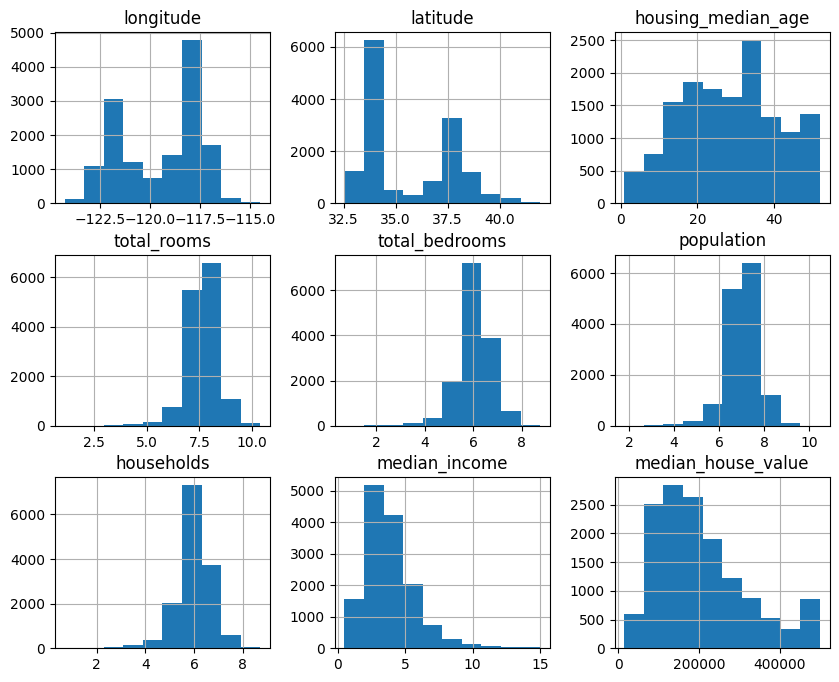

In [ ]:
train_data.hist(figsize=(10,8))

In [ ]:
train_data.ocean_proximity.value_counts()
pd.get_dummies(train_data.ocean_proximity)
train_data.join(pd.get_dummies(train_data.ocean_proximity))
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

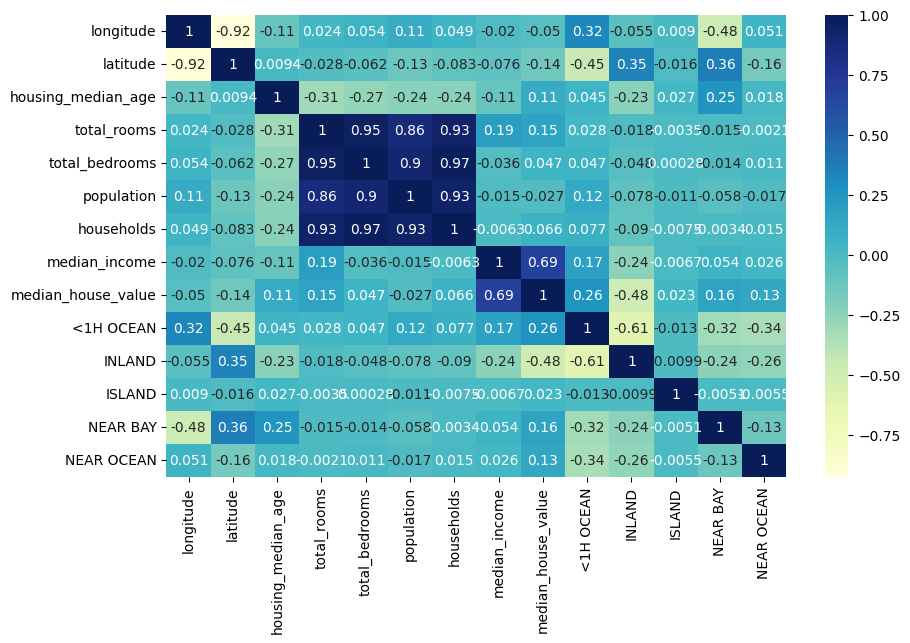

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

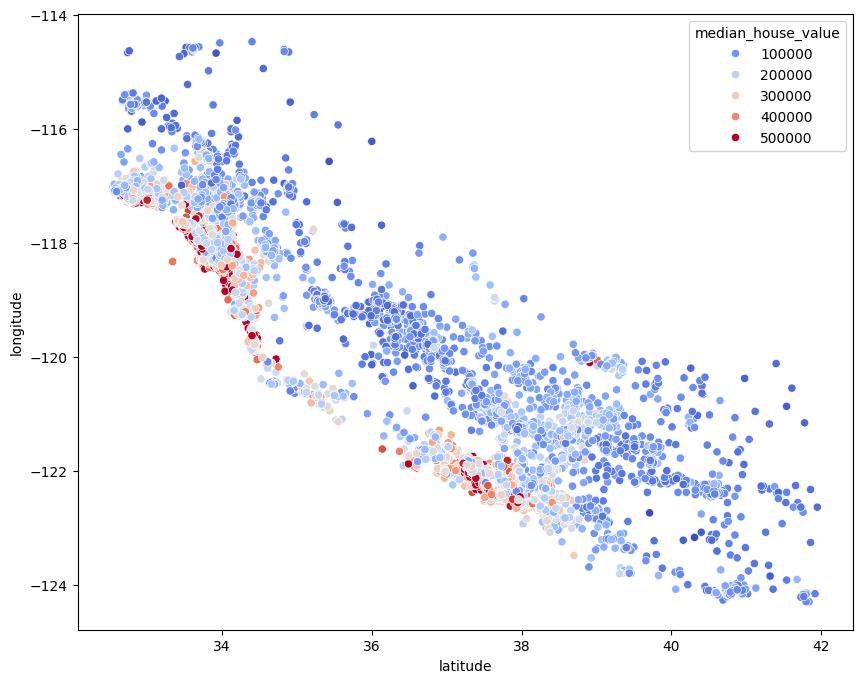

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [ ]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_ratio']=train_data['households']/train_data['total_rooms']

<Axes: >

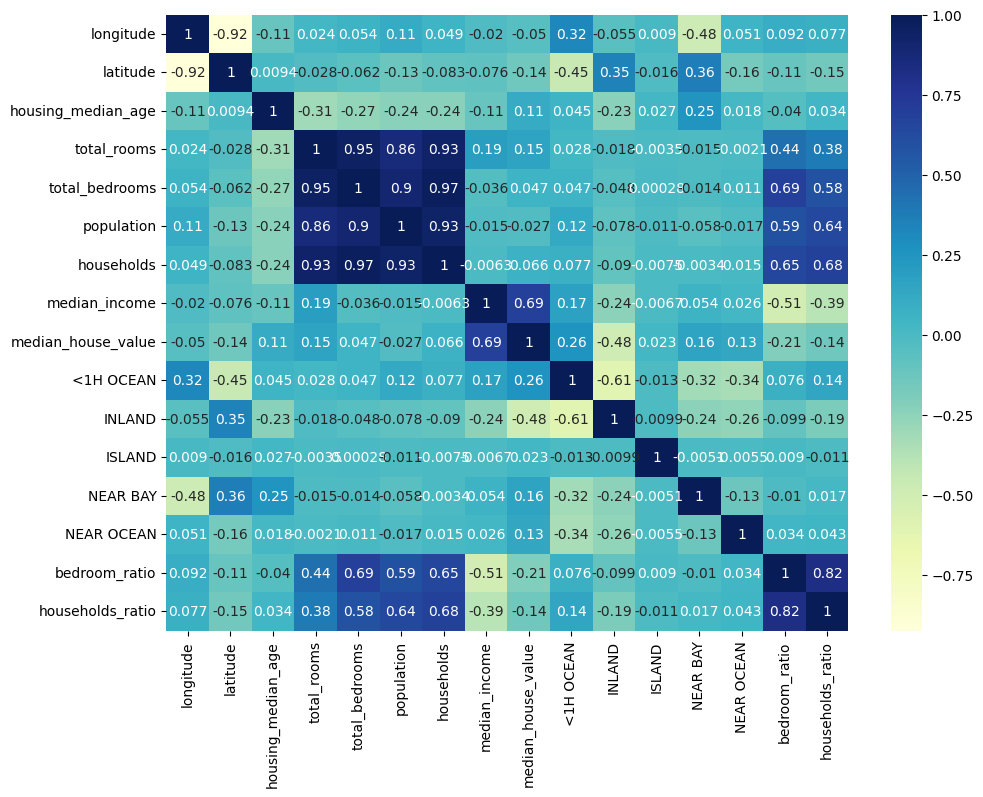

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

***Linear regression***

In [ ]:
from sklearn.linear_model import LinearRegression
train_data=train_data.drop(['ISLAND'],axis=1)
X_train, y_train= train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
2559,-124.15,40.81,50,5.831882,4.317488,5.463832,4.430817,1.7500,67500,False,False,False,True,0.740325,0.759758
1705,-122.29,37.94,20,8.933137,7.263330,8.199189,7.217443,4.4387,190000,False,False,True,False,0.813077,0.807941
1787,-122.35,37.93,28,7.598900,6.192362,7.075809,6.086775,2.3352,84300,False,False,True,False,0.814902,0.801007
4547,-118.20,34.02,42,6.212606,4.795791,6.308098,4.787492,3.7543,126600,True,False,False,False,0.771945,0.770609
14960,-116.92,32.76,9,7.528332,5.730100,6.854355,5.720312,5.9202,181300,True,False,False,False,0.761138,0.759838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19640,-120.79,37.53,20,7.257003,5.575949,6.749931,5.575949,3.3083,108300,False,True,False,False,0.768354,0.768354
19186,-122.66,38.46,14,7.768533,6.448889,7.170888,6.439350,2.6023,221100,True,False,False,False,0.830130,0.828902
10633,-117.79,33.70,16,8.741935,7.002156,8.239065,7.016610,6.3298,247100,True,False,False,False,0.800985,0.802638
2886,-118.98,35.38,28,7.066467,5.703782,7.085064,5.613128,0.8639,49400,False,True,False,False,0.807162,0.794333


In [ ]:
test_data=X_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7775,-118.09,33.90,36,1215,279.0,862,285,3.7604,<1H OCEAN,158700
5174,-118.27,33.95,34,987,248.0,902,221,2.3365,<1H OCEAN,98000
10752,-117.89,33.61,42,1301,280.0,539,249,5.0000,<1H OCEAN,500001
10347,-117.66,33.61,21,1932,266.0,860,286,7.1497,<1H OCEAN,274000
4153,-118.20,34.11,52,678,173.0,791,186,4.0625,<1H OCEAN,171300
...,...,...,...,...,...,...,...,...,...,...
19093,-122.61,38.25,18,2915,418.0,1340,421,5.2452,<1H OCEAN,204900
4318,-118.34,34.09,52,1731,502.0,849,466,3.2946,<1H OCEAN,321600
5064,-118.29,33.98,41,1582,416.0,1422,370,1.0516,<1H OCEAN,108300
16468,-121.27,38.12,37,2232,504.0,1455,471,2.5587,INLAND,87800


In [ ]:
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

In [ ]:
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data=test_data.drop(['ISLAND'],axis=1)

In [ ]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_ratio']=test_data['households']/test_data['total_rooms']

In [ ]:
X_test, y_test= test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
7775,-118.09,33.90,36,7.103322,5.634790,6.760415,5.655992,3.7604,158700,True,False,False,False,0.793261,0.796246
5174,-118.27,33.95,34,6.895683,5.517453,6.805723,5.402677,2.3365,98000,True,False,False,False,0.800131,0.783487
10752,-117.89,33.61,42,7.171657,5.638355,6.291569,5.521461,5.0000,500001,True,False,False,False,0.786200,0.769900
10347,-117.66,33.61,21,7.566828,5.587249,6.758095,5.659482,7.1497,274000,True,False,False,False,0.738387,0.747933
4153,-118.20,34.11,52,6.520621,5.159055,6.674561,5.231109,4.0625,171300,True,False,False,False,0.791191,0.802241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19093,-122.61,38.25,18,7.977968,6.037871,7.201171,6.045005,5.2452,204900,True,False,False,False,0.756818,0.757712
4318,-118.34,34.09,52,7.457032,6.220590,6.745236,6.146329,3.2946,321600,True,False,False,False,0.834191,0.824233
5064,-118.29,33.98,41,7.367077,6.033086,7.260523,5.916202,1.0516,108300,True,False,False,False,0.818925,0.803060
16468,-121.27,38.12,37,7.711101,6.224558,7.283448,6.156979,2.5587,87800,False,True,False,False,0.807220,0.798457


In [ ]:
reg.score(X_test,y_test)

0.6681683264612424

***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test,y_test)

0.8166902231957782